# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [3]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [4]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}   # 创建了一个字典，True为1，False为0
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

''' 这段代码使用了列表解析式（list comprehension）的语法结构
列表解析式是一种简洁的方法，用于创建新的列表
具体来说，这个列表解析式可以分为两部分：外部和内部

外部部分：
z_obs=[……for line in sms_data]
这个循环语句遍历了sms_data列表中的每个元素，将其命名为line。
这样，我们可以逐个处理每条短信文本

内部部分：
TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])]

在内部部分，我们先对line进行操作，就是取出line元素的第一个元素line[0],也就是短信文本

然后，我们使用split(' ')方法将文本按空格进行分割，得到一个单词列表。

接着，我们使用列表解析式[word.lower() for word in line[0].split(' ')]对单词列表进行操作
将其中的每个单词都转换成小写形式word.lower(),并生成一个新列表

最后，我们使用interesting_words.isdisjoint(...)检查有趣单词集合与新的单词列表的交集是否为空集
isdisjoint(...)方法返回一个布尔值，如果交集为空集，则返回True，否则返回False。
在这里，我们使用not关键字对返回的布尔值取反，
即如果交集为空集，则结果为True，否则为False

最终，内部部分的表达式
TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])]
会返回一个值，根据这个值来选择TF10字典中对应的值（1,0）

整个列表解析式的作用是遍历sms_data列表中的每个元素
对每条短信文本进行处理
生成一个由0和1组成的观测值列表Z_obs，
表示每条短信文本是否包含free或prize
'''

" 这段代码使用了列表解析式（list comprehension）的语法结构\n列表解析式是一种简洁的方法，用于创建新的列表\n具体来说，这个列表解析式可以分为两部分：外部和内部\n\n外部部分：\nz_obs=[……for line in sms_data]\n这个循环语句遍历了sms_data列表中的每个元素，将其命名为line。\n这样，我们可以逐个处理每条短信文本\n\n内部部分：\nTF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])]\n\n在内部部分，我们先对line进行操作，就是取出line元素的第一个元素line[0],也就是短信文本\n\n然后，我们使用split(' ')方法将文本按空格进行分割，得到一个单词列表。\n\n接着，我们使用列表解析式[word.lower() for word in line[0].split(' ')]对单词列表进行操作\n将其中的每个单词都转换成小写形式word.lower(),并生成一个新列表\n\n最后，我们使用interesting_words.isdisjoint(...)检查有趣单词集合与新的单词列表的交集是否为空集\nisdisjoint(...)方法返回一个布尔值，如果交集为空集，则返回True，否则返回False。\n在这里，我们使用not关键字对返回的布尔值取反，\n即如果交集为空集，则结果为True，否则为False\n\n最终，内部部分的表达式\nTF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])]\n会返回一个值，根据这个值来选择TF10字典中对应的值（1,0）\n\n整个列表解析式的作用是遍历sms_data列表中的每个元素\n对每条短信文本进行处理\n生成一个由0和1组成的观测值列表Z_obs，\n表示每条短信文本是否包含free或prize\n"

In [5]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [6]:
Y_obs = [y for x,y in sms_data] 
# 创建一个由sms_data中每个元素的第二个元素y组成的列表 Y_obs

Y_obs[:10]
# 对列表Y_obs进行切片，只获取前10个元素。

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [10]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y,z in zip (Y_obs,Z_obs)])
'''
这里，我们使用了zip()函数将Y_obs和Z_obs两个列表进行元素级别的配对
zip()函数会生成一个迭代器，
每次返回Y_obs和Z_obs中对应位置的元素
接着，通过循环遍历迭代器中的元素，
我们将每对配对的元素命名为y和z
对于每个y和z，我们使用条件语句，
y<=x[0] and z<=x[1]来判断它们是否满足要求。
如果满足条件，即y小于等于x的第一个元素，且z小于等于x的第二个元素
则取出TF10[True]的值，即1
否则取False的值，即0
这样就生成了一个包含0和1的列表
最后，使用np.mean()函数对列表中的元素求均值，得到最终的结果
总结来说，函数F_X_12()的目的是计算基于输入x的均值。
它通过遍历配对的Y_obs和Z_obs元素，并根据条件语句选择相应的值（0或1）
最后求得这些值的均值作为函数的返回值
'''

'\n这里，我们使用了zip()函数将Y_obs和Z_obs两个列表进行元素级别的配对\nzip()函数会生成一个迭代器，\n每次返回Y_obs和Z_obs中对应位置的元素\n接着，通过循环遍历迭代器中的元素，\n我们将每对配对的元素命名为y和z\n对于每个y和z，我们使用条件语句，\ny<=x[0] and z<=x[1]来判断它们是否满足要求。\n如果满足条件，即y小于等于x的第一个元素，且z小于等于x的第二个元素\n则取出TF10[True]的值，即1\n否则取False的值，即0\n这样就生成了一个包含0和1的列表\n最后，使用np.mean()函数对列表中的元素求均值，得到最终的结果\n总结来说，函数F_X_12()的目的是计算基于输入x的均值。\n它通过遍历配对的Y_obs和Z_obs元素，并根据条件语句选择相应的值（0或1）\n最后求得这些值的均值作为函数的返回值\n'

In [11]:
F_X_12([1,0])
# 它将会计算在条件y<=1 and z<=0的条件下，得到的均值

0.9551328068916008

This is the JDF for this problem

In [12]:
#这段代码是一个简单的循环结构，用于打印一个二维表格，表格中包含了一些条件概率的计算结果。

print("\tz <= 0 \t\tz <= 1")
#打印表头，包括两列，分别表示 z 小于等于 0 和 z 小于等于 1 的情况。
#\t\t 是制表符，用于在输出中创建水平间距。

for x1 in range(0,2):
#外层循环，遍历 x1 的取值范围为 0 到 1（不包括2）。
    print("y <= %d \t" % x1,end='')
    #打印表格中每一行的行头，包括 y 小于等于 x1 的情况。
    for x2 in range(0,2):
    #内层循环，遍历 x2 的取值范围为 0 到 1（不包括2）
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
        #打印条件概率的值，使用函数 F_X_12((x1,x2)) 来计算并保留两位小数，然后以制表符分隔。

    print('\n')
    #内层循环结束后换行，开始新的一行的打印。



	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [13]:
F_X_12((1,0))

0.9551328068916008

In [14]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [15]:
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [16]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [17]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

#zip(Z_obs, Y_obs)：将 Z_obs 和 Y_obs 中的每个元素逐一配对，形成一个由元组组成的列表。
#使用列表推导式从配对好的列表中提取出 Y_obs 中与 Z_obs 中值为 1 的元素对应的值。
#if z == 1：只选择 Z_obs 中值为 1 的元素对应的 Y_obs 中的值。
#np.mean(...)：计算选中的 Y_obs 中的值的平均值

0.812

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [18]:
# Or we can just compute it directly
np.mean(Y_obs)

0.13406317300789664

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [19]:
import numpy as np
x = np.random.normal(size=100)

In [20]:
np.mean(x)

-0.07676777541576839

In [21]:
g = lambda x: x**2

In [22]:
mean = np.mean(x)
y = x-mean
np.mean(y**4)

3.549905647648922

## Moments etc

In [23]:
import numpy as np
x = np.random.normal(size=100)

In [24]:
x

array([-1.05985671, -0.79584771,  0.32947746,  0.81266104, -0.90401447,
        0.14807571, -1.34517383, -0.13289656,  0.03669479,  0.61560619,
        0.61097138, -1.54400382, -0.34859803,  0.01210582, -1.38720104,
        0.70586993, -1.53741379,  0.89195629,  0.58465789, -0.59985849,
       -2.86701674,  0.34132237, -0.44973161, -2.03146366, -0.10382266,
        0.08819886,  1.53388254,  0.27081834, -0.56642029, -0.21918986,
        0.6543188 , -1.21799832,  0.10496607, -0.04324095,  0.53001093,
       -0.79385422,  0.38620483,  0.08536938,  0.74722834,  0.2042177 ,
       -1.86851518,  0.62316716, -0.01241111, -0.3777536 ,  1.5356345 ,
       -0.03411028, -1.02201733,  0.11614785,  0.63146471,  0.25788871,
        0.83016646, -1.08779247,  1.29531043, -0.04595117, -2.15092081,
        1.9831971 , -0.0082599 , -0.28345644, -1.08619367, -0.54532041,
        0.34286278,  2.06761626,  1.38732492,  1.49730136,  1.59060638,
        0.32765935, -0.78168543,  0.95871037, -0.23743363,  2.10

## Sample mean

In [25]:
np.mean(x)

0.04643199796529371

## Sample variance

In [26]:
np.var(x)

1.0360633480716146

Or by doing it yourself

In [27]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

#np.power(x-mu,2)表示将数组x中的每个元素减去均值mu后平方，得到一个新的数组，
#然后np.mean函数对这个新数组中的所有元素取平均值，最终得到的结果就是数组x的方差。

1.0360633480716146

Higher moments, we can use `scipy`

In [28]:
from scipy.stats import skew, kurtosis

'''这段代码使用了SciPy库中的skew和kurtosis函数来计算数组x的偏度和峰度。
skew(x)：调用skew函数，计算数组x的偏度，返回一个浮点数。
偏度是用来衡量数据分布的不对称性的统计量，
当偏度为0时表示数据分布对称，
当偏度大于0时表示数据分布右偏（也称正偏），
当偏度小于0时表示数据分布左偏（也称负偏）。
kurtosis(x, fisher=False)：调用kurtosis函数，计算数组x的峰度，返回一个浮点数。
峰度是用来衡量数据分布峰态的统计量，
当峰度为0时表示数据分布与正态分布相同，
当峰度大于0时表示数据分布比正态分布更陡峭（也称尖峰），
当峰度小于0时表示数据分布比正态分布更平缓（也称扁平）。
参数fisher=False表示使用非Fisher定义的峰度计算方式。'''

'这段代码使用了SciPy库中的skew和kurtosis函数来计算数组x的偏度和峰度。\nskew(x)：调用skew函数，计算数组x的偏度，返回一个浮点数。\n偏度是用来衡量数据分布的不对称性的统计量，\n当偏度为0时表示数据分布对称，\n当偏度大于0时表示数据分布右偏（也称正偏），\n当偏度小于0时表示数据分布左偏（也称负偏）。\nkurtosis(x, fisher=False)：调用kurtosis函数，计算数组x的峰度，返回一个浮点数。\n峰度是用来衡量数据分布峰态的统计量，\n当峰度为0时表示数据分布与正态分布相同，\n当峰度大于0时表示数据分布比正态分布更陡峭（也称尖峰），\n当峰度小于0时表示数据分布比正态分布更平缓（也称扁平）。\n参数fisher=False表示使用非Fisher定义的峰度计算方式。'

In [29]:
skew(x)

-0.04940136078326381

In [30]:
kurtosis(x,fisher=False)
'''x代表输入的数据集，可以是一个一维数组、列表或其他可迭代对象。
fisher是一个布尔值参数，默认为False。
当fisher为False时，计算的峰度值是非调整的峰度值；
当fisher为True时，计算的峰度值是调整的峰度值。'''

'x代表输入的数据集，可以是一个一维数组、列表或其他可迭代对象。\nfisher是一个布尔值参数，默认为False。\n当fisher为False时，计算的峰度值是非调整的峰度值；\n当fisher为True时，计算的峰度值是调整的峰度值。'

## Moments and tail behavior

In [31]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

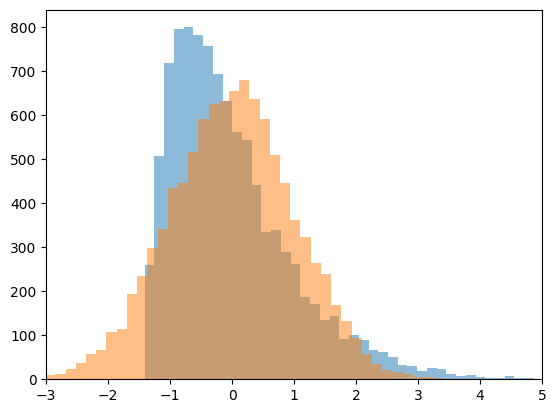

In [36]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [37]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [38]:
print_basic_stats(standardize(normal))

mean: -0.00	std: 1.00	skew: -0.04	kurtosis: 2.99


In [39]:
print_basic_stats(standardize(chi2))

mean: -0.00	std: 1.00	skew: 1.35	kurtosis: 5.51


In [40]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: -0.00	std: 1.00	skew: 0.38	kurtosis: 2.99


In [41]:
np.mean(np.power(standardize(chi2),3)) # Skewness

1.347027546694522

In [42]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

5.510443475059276

## Transformations of random variables

Consider a Binomial random variable

In [54]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)

Lets plot the empirical density

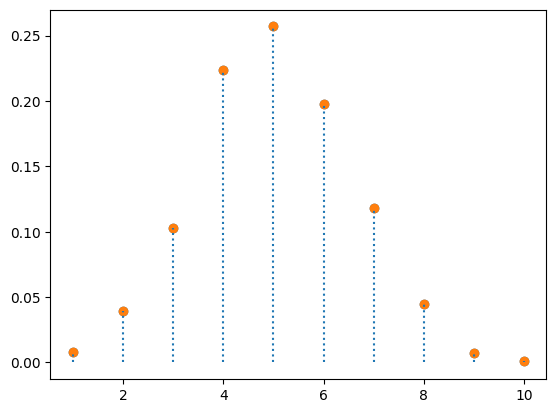

In [55]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

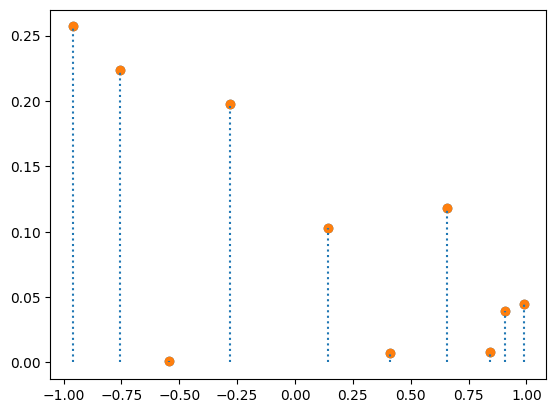

In [56]:
plotEMF(makeEMF(np.sin(x)))

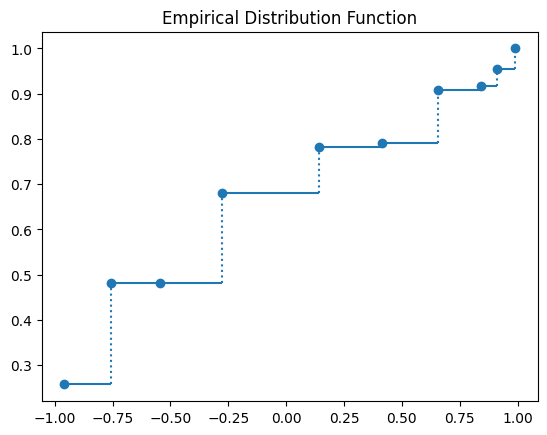

In [57]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [58]:
Y_space = np.sort(np.sin(np.arange(0,11)))

#np.arange(0, 11) 生成一个包含 0 到 10 的整数的数组。
#np.sin(np.arange(0, 11)) 对这个数组中的每个元素求正弦值。
#np.sort(...) 对正弦值数组进行排序。
#最终，Y_space 包含了按照正弦函数值排序的数组。

sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

#np.arange(0, 11) 生成一个包含 0 到 10 的整数的数组，这将作为索引。
#np.sin(np.arange(0, 11)) 对这个数组中的每个元素求正弦值，这将作为字典的键。
#zip(...) 将这两个数组逐对组合，创建了一个元组的序列。
#dict(...) 将这个元组的序列转换为字典。
#最终，sin_inv 是一个字典，将正弦函数值映射到对应的索引

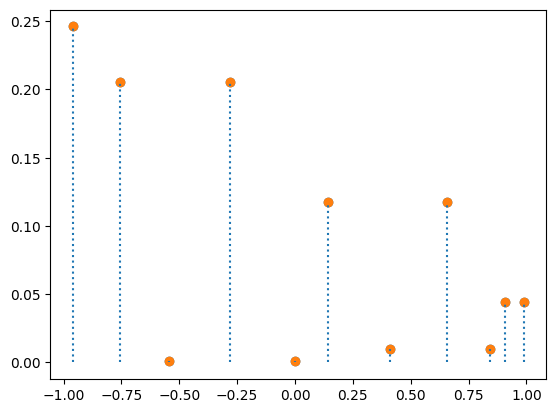

In [59]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

#关于第二句的语法结构理解：
#for y in Y_space: 这部分是一个迭代器，它遍历 Y_space 中的每个元素，并将其赋值给变量 y
#在迭代过程中，对每个y的取值，执行以下操作：
#binomial(n, sin_inv[y]): 计算二项式系数，其中 n 是总试验次数，sin_inv[y] 是成功的次数。

In [62]:
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))

ModuleNotFoundError: No module named 'module_name'